In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# 2D Unet

reference: https://arxiv.org/pdf/1505.04597.pdf
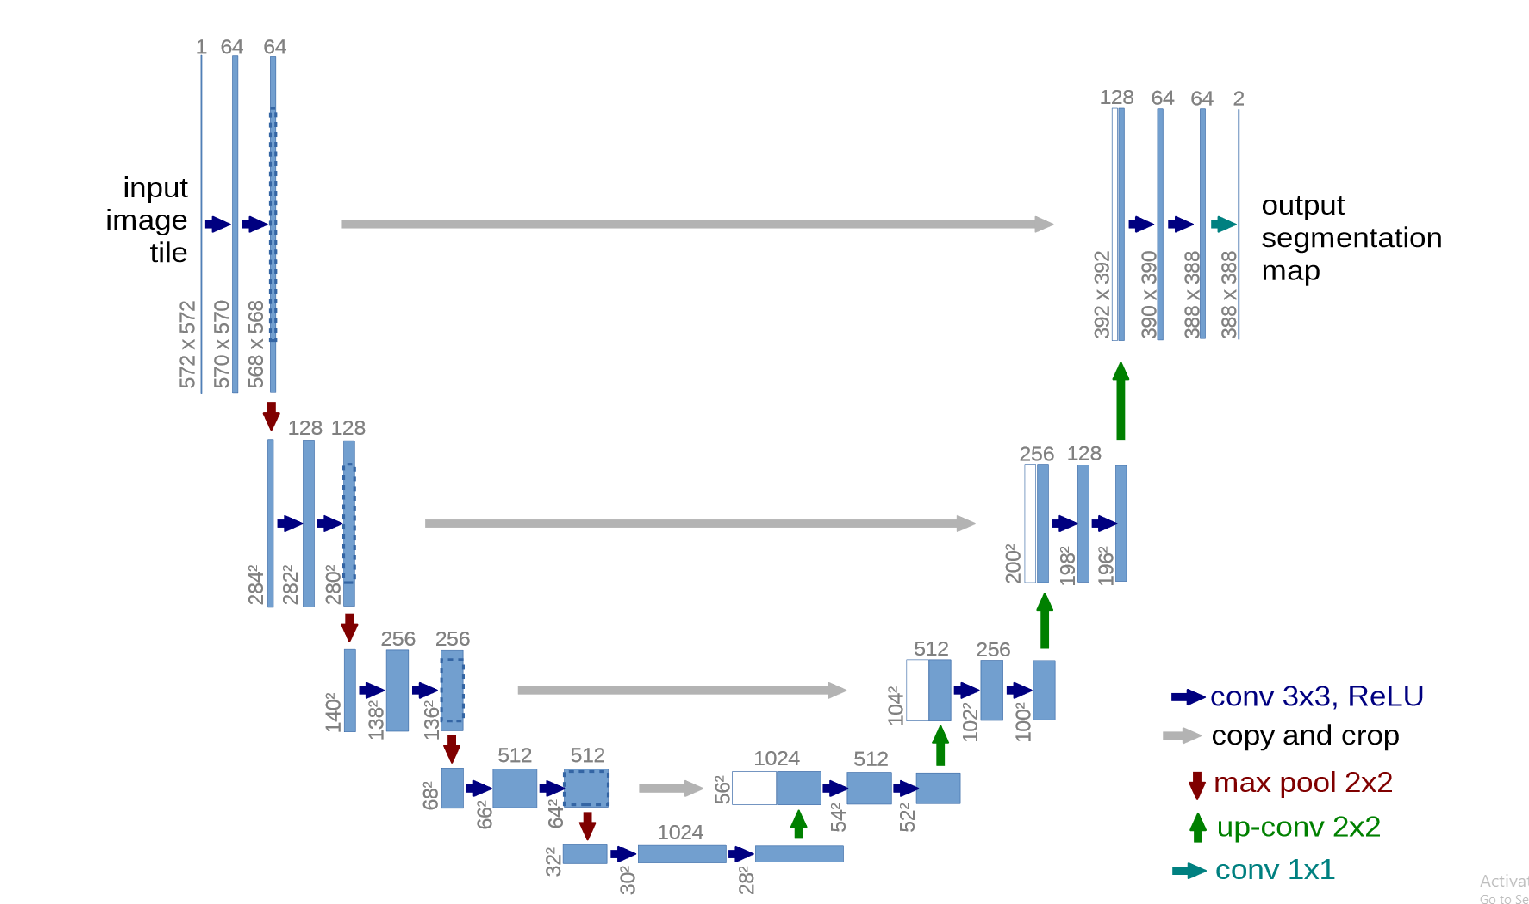

    Note: numbers need to be tuned for 512x512 images, paper uses 572x572 images

In [14]:
# convs: 3x3 unpadded, relu
# maxpooling: 2x2, stride = 2
#     double number of features after every maxpooling
# up-convolution: upsamping 2x2, followed by 2x2 convolution
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, Cropping2D, Concatenate

def Unet2D(input_size = (512,512,1)):
    # Contracting Path
    inputs = Input(input_size)
    conv_1 = Conv2D(64,(3,3), activation='relu', padding='same')(inputs)
    conv_1 = Conv2D(64,(3,3), activation='relu', padding='same')(conv_1)
    maxP_1 = MaxPool2D(pool_size=(2,2), strides=2)(conv_1)

    conv_2 = Conv2D(128,(3,3), activation='relu', padding='same')(maxP_1)
    conv_2 = Conv2D(128,(3,3), activation='relu', padding='same')(conv_2)
    maxP_2 = MaxPool2D(pool_size=(2,2), strides=2)(conv_2)

    conv_3 = Conv2D(256,(3,3), activation='relu', padding='same')(maxP_2)
    conv_3 = Conv2D(256,(3,3), activation='relu', padding='same')(conv_3)
    maxP_3 = MaxPool2D(pool_size=(2,2), strides=2)(conv_3)

    conv_4 = Conv2D(512,(3,3), activation='relu', padding='same')(maxP_3)
    conv_4 = Conv2D(512,(3,3), activation='relu', padding='same')(conv_4)
    maxP_4 = MaxPool2D(pool_size=(2,2), strides=2)(conv_4)

    conv_5 = Conv2D(1024,(3,3), activation='relu', padding='same')(maxP_4)
    conv_5 = Conv2D(1024,(3,3), activation='relu', padding='same')(conv_5)
    
    # Expansive Path
    upSamp_6 = UpSampling2D(size=(2,2))(conv_5)
    upSamp_6 = Conv2D(512,(2,2), padding = 'same')(upSamp_6)
    crop_6 = Cropping2D()(conv_4)
    combine_6 = Concatenate()([crop_6,upSamp_6])
    conv_6 = Conv2D(512,(3,3), activation='relu', padding='same')(combine_6)
    conv_6 = Conv2D(512,(3,3), activation='relu', padding='same')(conv_6)
    
    upSamp_7 = UpSampling2D(size=(2,2))(conv_6)
    upSamp_7 = Conv2D(256,(2,2), padding = 'same')(upSamp_7)
    crop_7 = Cropping2D()(conv_3)
    combine_7 = Concatenate()([crop_7,upSamp_7])
    conv_7 = Conv2D(256,(3,3), activation='relu', padding='same')(combine_7)
    conv_7 = Conv2D(256,(3,3), activation='relu', padding='same')(conv_7)
    
    upSamp_8 = UpSampling2D(size=(2,2))(conv_7)
    upSamp_8 = Conv2D(128,(2,2), padding = 'same')(upSamp_8)
    crop_8 = Cropping2D()(conv_2)
    combine_8 = Concatenate()([crop_8,upSamp_8])
    conv_8 = Conv2D(128,(3,3), activation='relu', padding='same')(combine_8)
    conv_8 = Conv2D(128,(3,3), activation='relu', padding='same')(conv_8)
    
    upSamp_9 = UpSampling2D(size=(2,2))(conv_8)
    upSamp_9 = Conv2D(64,(2,2), padding = 'same')(upSamp_9)
    crop_9 = Cropping2D()(conv_1)
    combine_9 = Concatenate()([crop_9,upSamp_9])
    conv_9 = Conv2D(64,(3,3), activation='relu', padding='same')(combine_9)
    conv_9 = Conv2D(64,(3,3), activation='relu', padding='same')(conv_9)
    outputs = Conv2D(1,(1,1), activation='sigmoid', padding='same')(conv_9)
        
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

x_2d = Unet2D()


In [15]:
print(x_2d.summary(line_length = 150))

Model: "model"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_12 (InputLayer)                            [(None, 512, 512, 1)]            0                                                                   
______________________________________________________________________________________________________________________________________________________
conv2d_154 (Conv2D)                              (None, 512, 512, 64)             640               input_12[0][0]                                    
______________________________________________________________________________________________________________________________________________________
conv2d_155 (Conv2D)                              (None, 512, 512, 64)          

# 3D Unet

Reference: https://arxiv.org/pdf/1606.06650.pdf
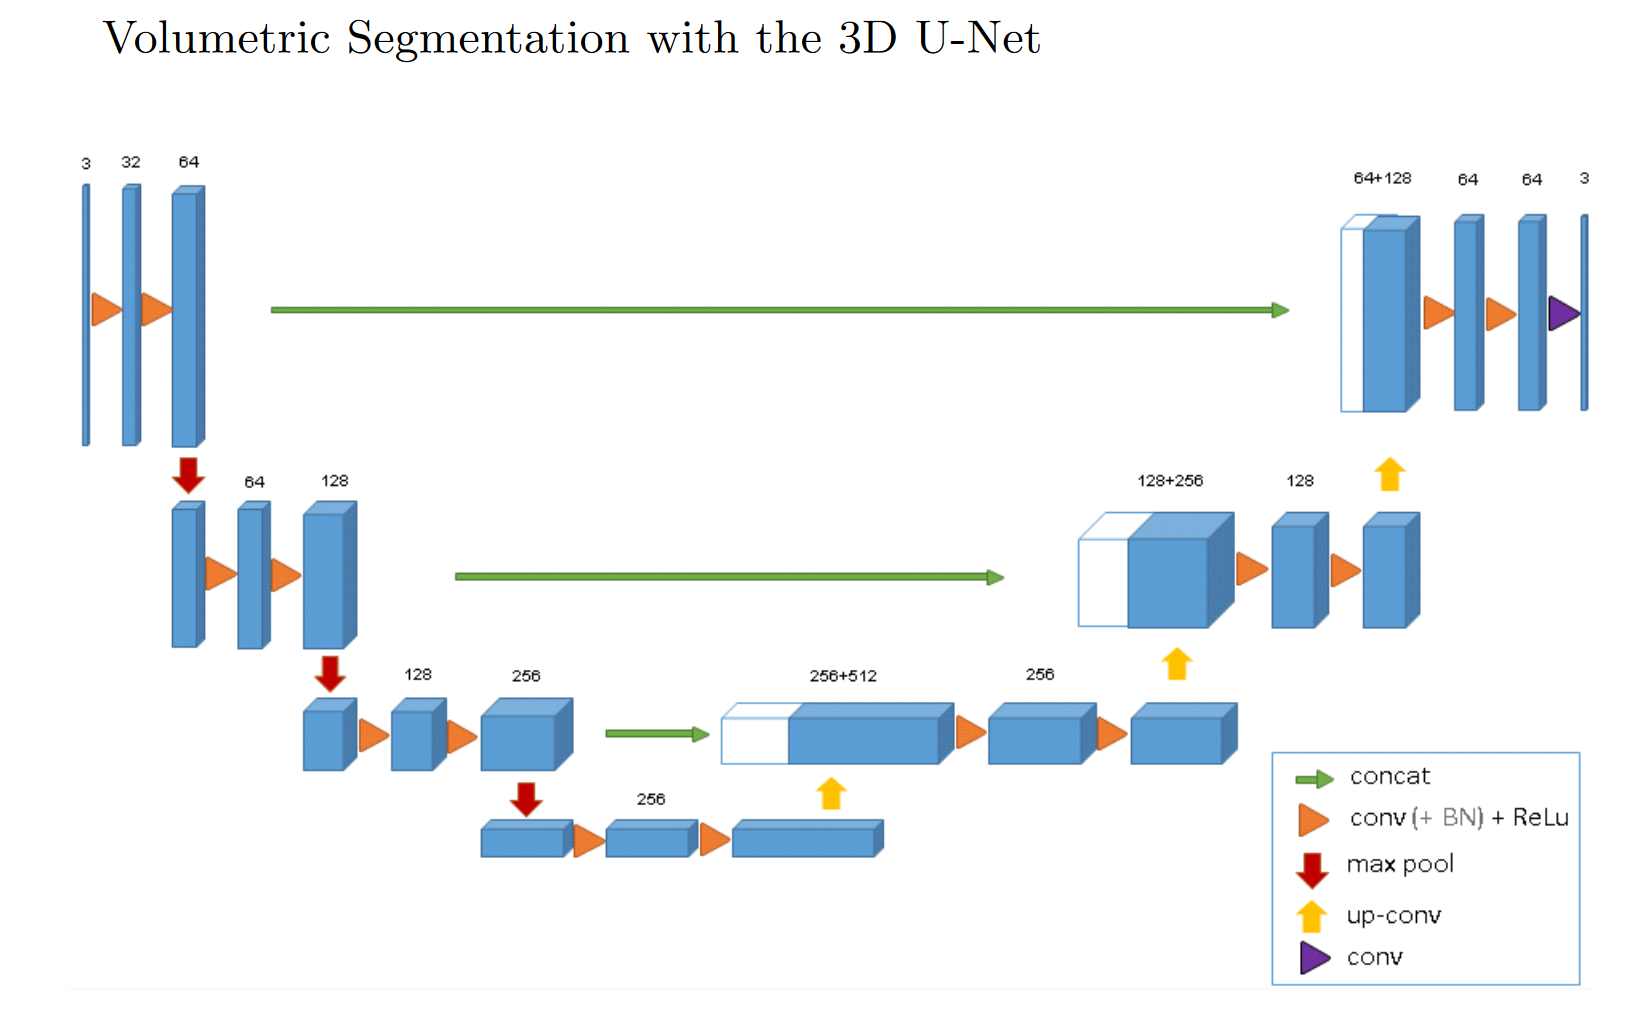

In [10]:
# convs: 3x3x3 unpadded, BatchNormalization, relu
# maxpooling: 2x2x2, stride = 2
# up-convolution: upsamping 2x2x2, followed by padded 2x2x2 convolution 
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv3D, MaxPool3D, BatchNormalization, ReLU, UpSampling3D, Cropping3D, Concatenate

def Unet3D(input_size = (64,512,512,1)):
    # Analysis Path
    inputs = Input(input_size)
    conv_1 = Conv3D(32,(3,3,3), padding='same')(inputs)
#     conv_1 = BatchNormalization()(conv_1)
    conv_1 = ReLU()(conv_1)
    conv_1 = Conv3D(64,(3,3,3), padding='same')(conv_1)
#     conv_1 = BatchNormalization()(conv_1)
    conv_1 = ReLU()(conv_1)
    maxP_1 = MaxPool3D(pool_size=(2,2,2), strides=2)(conv_1)

    conv_2 = Conv3D(64,(3,3,3), padding='same')(maxP_1)
#     conv_2 = BatchNormalization()(conv_2)
    conv_2 = ReLU()(conv_2)
    conv_2 = Conv3D(128,(3,3,3), padding='same')(conv_2)
#     conv_2 = BatchNormalization()(conv_2)
    conv_2 = ReLU()(conv_2)
    maxP_2 = MaxPool3D(pool_size=(2,2,2), strides=2)(conv_2)

    conv_3 = Conv3D(128,(3,3,3), padding='same')(maxP_2)
#     conv_3 = BatchNormalization()(conv_3)
    conv_3 = ReLU()(conv_3)
    conv_3 = Conv3D(256,(3,3,3), padding='same')(conv_3)
#     conv_3 = BatchNormalization()(conv_3)
    conv_3 = ReLU()(conv_3)
    maxP_3 = MaxPool3D(pool_size=(2,2,2), strides=2)(conv_3)

    conv_4 = Conv3D(256,(3,3,3), padding='same')(maxP_3)
#     conv_4 = BatchNormalization()(conv_4)
    conv_4 = ReLU()(conv_4)
    conv_4 = Conv3D(512,(3,3,3), padding='same')(conv_4)
#     conv_4 = BatchNormalization()(conv_4)
    conv_4 = ReLU()(conv_4)
    
    # Synthesis Path
    upSamp_5 = UpSampling3D(size=(2,2,2))(conv_4)
    upSamp_5 = Conv3D(512,(2,2,2), padding = 'same')(upSamp_5)
    crop_5 = Cropping3D(0)(conv_3)
    combine_5 = Concatenate()([crop_5,upSamp_5])
    conv_5 = Conv3D(256,(3,3,3), padding='same')(combine_5)
#     conv_5 = BatchNormalization()(conv_5)
    conv_5 = ReLU()(conv_5)
    conv_5 = Conv3D(256,(3,3,3), padding='same')(conv_5)
#     conv_5 = BatchNormalization()(conv_5)
    conv_5 = ReLU()(conv_5)
    
    upSamp_6 = UpSampling3D(size=(2,2,2))(conv_5)
    upSamp_6 = Conv3D(256,(2,2,2), padding = 'same')(upSamp_6)
    crop_6 = Cropping3D(0)(conv_2)
    combine_6 = Concatenate()([crop_6,upSamp_6])
    conv_6 = Conv3D(128,(3,3,3), padding='same')(combine_6)
#     conv_6 = BatchNormalization()(conv_6)
    conv_6 = ReLU()(conv_6)
    conv_6 = Conv3D(128,(3,3,3), padding='same')(conv_6)
#     conv_6 = BatchNormalization()(conv_6)
    conv_6 = ReLU()(conv_6)
    
    upSamp_7 = UpSampling3D(size=(2,2,2))(conv_6)
    upSamp_7 = Conv3D(128,(2,2,2), padding = 'same')(upSamp_7)
    crop_7 = Cropping3D(0)(conv_1)
    combine_7 = Concatenate()([crop_7,upSamp_7])
    conv_7 = Conv3D(64,(3,3,3), padding='same')(combine_7)
#     conv_7 = BatchNormalization()(conv_7)
    conv_7 = ReLU()(conv_7)
    conv_7 = Conv3D(64,(3,3,3), padding='same')(conv_7)
#     conv_7 = BatchNormalization()(conv_7)
    conv_7 = ReLU()(conv_7)
    conv_7 = Conv3D(1,(1,1,1), padding='same', activation='sigmoid')(conv_7)
    
    model = tf.keras.Model(inputs=inputs, outputs=conv_7)
    
    return model

x_3d = Unet3D()


In [11]:
print(x_3d.summary(line_length = 150))

Model: "model_2"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_4 (InputLayer)                             [(None, 64, 512, 512, 1)]        0                                                                   
______________________________________________________________________________________________________________________________________________________
conv3d_44 (Conv3D)                               (None, 64, 512, 512, 32)         896               input_4[0][0]                                     
______________________________________________________________________________________________________________________________________________________
re_lu_34 (ReLU)                                  (None, 64, 512, 512, 32)    

# Load Data and Train

# 2D

In [4]:
# RUNS WITH HARMEETS DIRECTORY SETUP
#Load and preprocess data
import tensorflow as tf

import os
import numpy as np

datadir = './LCTSC/data/'
segdir = './LCTSC/seg/'

k=0
for dirs in os.listdir(datadir):
    if k < 1:
        if 'data' in dirs:
            data = np.load(datadir+dirs)[:,:,:100]
            data = np.transpose(data)
            data_out = np.zeros((100,572,572))
            for i in range(100):
                data_out[i,:,:] = np.pad(data[i,:,:],30, mode = 'edge')
            data_reshape = data_out.reshape((100,572,572,1))

            if k == 0:
                traindata = data_reshape
                k += 1
            else:
                traindata = np.concatenate((traindata, data_reshape), axis=0)
                k += 1
            print(traindata.shape)

k=0       
for dirs in os.listdir(segdir):
    if k < 1:
        if 'Heart' in dirs:
            label = np.load(segdir+dirs)[:,:,:100]
            label = np.transpose(label)
            label_out = np.zeros((100,388,388))
            for i in range(100):
                label_out[i,:,:] = label[i,62:450, 62:450]
            label_reshape = label_out.reshape((100,388,388,1))

            if k == 0:
                heartdata = label_reshape
                k += 1
            else:
                heartdata = np.concatenate((heartdata, label_reshape), axis=0)
                k += 1
            print(heartdata.shape)
        
        
            

(100, 572, 572, 1)
(200, 572, 572, 1)
(300, 572, 572, 1)
(400, 572, 572, 1)
(500, 572, 572, 1)
(600, 572, 572, 1)
(700, 572, 572, 1)
(800, 572, 572, 1)
(900, 572, 572, 1)
(1000, 572, 572, 1)
(100, 388, 388, 1)
(200, 388, 388, 1)
(300, 388, 388, 1)
(400, 388, 388, 1)
(500, 388, 388, 1)
(600, 388, 388, 1)
(700, 388, 388, 1)
(800, 388, 388, 1)
(900, 388, 388, 1)
(1000, 388, 388, 1)


In [18]:
# Karndeep's Computer
# RUN A SINGLE TEST AND VAL SET LOCALLY
import numpy as np
data_dir = 'C:/Users/19095/Documents/ECE228/NBIA_CT_Data/LCTSC/LCTSC-Test-S1-101/03-03-2004-08186/CTvolume.npy'
label_dir = 'C:/Users/19095/Documents/ECE228/NBIA_CT_Data/LCTSC/LCTSC-Test-S1-101/03-03-2004-08186/Lung_L.npy'

test_data_dir = 'C:/Users/19095/Documents/ECE228/NBIA_CT_Data/LCTSC/LCTSC-Test-S1-102/11-04-2003-RTRCCTTHORAX8FHigh Adult-20444/CTvolume.npy'
test_label_dir = 'C:/Users/19095/Documents/ECE228/NBIA_CT_Data/LCTSC/LCTSC-Test-S1-102/11-04-2003-RTRCCTTHORAX8FHigh Adult-20444/Lung_L.npy'

# data
data = np.load(data_dir)[:,:,:100]
data = np.transpose(data)
# data_out = np.zeros((100,572,572))
# for i in range(100):
#     data_out[i,:,:] = np.pad(data[i,:,:],30, mode = 'edge')
# data_reshape = data_out.reshape((100,572,572,1))
data_reshape = data.reshape((100,512,512,1))


# test data
test_data = np.load(test_data_dir)[:,:,:100]
test_data = np.transpose(test_data)
# test_data_out = np.zeros((100,572,572))
# for i in range(100):
#     test_data_out[i,:,:] = np.pad(test_data[i,:,:],30, mode = 'edge')
# test_data_reshape = test_data_out.reshape((100,572,572,1))
test_data_reshape = test_data.reshape((100,512,512,1))


# label
label = np.load(label_dir)[:,:,:100]/3
label = np.transpose(label)
# label_out = np.zeros((100,388,388))
# for i in range(100):
#     label_out[i,:,:] = label[i,62:450, 62:450]
# label_reshape = label_out.reshape((100,388,388,1))
label_reshape = label.reshape((100,512,512,1))


# test label
test_label = np.load(test_label_dir)[:,:,:100]/3
test_label = np.transpose(test_label)
# test_label_out = np.zeros((100,388,388))
# for i in range(100):
#     test_label_out[i,:,:] = test_label[i,62:450, 62:450]
# test_label_reshape = test_label_out.reshape((100,388,388,1))
test_label_reshape = test_label.reshape((100,512,512,1))


In [19]:
# Compile and train the model
x_2d.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = x_2d.fit(data_reshape, label_reshape, epochs=5, batch_size=1, shuffle=True,validation_data=(test_data_reshape, test_label_reshape))

Epoch 1/5
100/100 [==============================] - 54s 539ms/step - loss: 0.3577 - accuracy: 0.9666 - val_loss: 0.0553 - val_accuracy: 0.9840
Epoch 2/5
100/100 [==============================] - 53s 534ms/step - loss: 0.0826 - accuracy: 0.9763 - val_loss: 0.1430 - val_accuracy: 0.9840
Epoch 3/5
100/100 [==============================] - 54s 542ms/step - loss: 0.0673 - accuracy: 0.9757 - val_loss: 0.0405 - val_accuracy: 0.9840
Epoch 4/5
100/100 [==============================] - 54s 539ms/step - loss: 0.0545 - accuracy: 0.9761 - val_loss: 0.0377 - val_accuracy: 0.9840
Epoch 5/5
100/100 [==============================] - 53s 531ms/step - loss: 0.0945 - accuracy: 0.9753 - val_loss: 0.0400 - val_accuracy: 0.9840


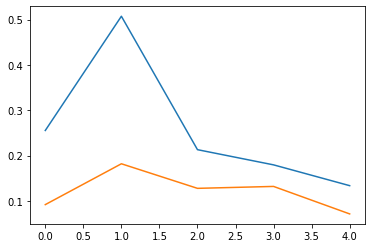

In [10]:
import matplotlib.pyplot as plt
history.history.keys()
epochs = [x for x in range(5)]
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

# 3D

In [6]:
# Karndeep's Computer
# RUN A SINGLE TEST AND VAL SET LOCALLY
import numpy as np
data_dir = 'C:/Users/19095/Documents/ECE228/NBIA_CT_Data/LCTSC/LCTSC-Test-S1-101/03-03-2004-08186/CTvolume.npy'
label_dir = 'C:/Users/19095/Documents/ECE228/NBIA_CT_Data/LCTSC/LCTSC-Test-S1-101/03-03-2004-08186/Lung_L.npy'

test_data_dir = 'C:/Users/19095/Documents/ECE228/NBIA_CT_Data/LCTSC/LCTSC-Test-S1-102/11-04-2003-RTRCCTTHORAX8FHigh Adult-20444/CTvolume.npy'
test_label_dir = 'C:/Users/19095/Documents/ECE228/NBIA_CT_Data/LCTSC/LCTSC-Test-S1-102/11-04-2003-RTRCCTTHORAX8FHigh Adult-20444/Lung_L.npy'

# data
data = np.load(data_dir)[:,:,:64]
data = np.transpose(data)
# data_out = np.zeros((100,572,572))
# for i in range(100):
#     data_out[i,:,:] = np.pad(data[i,:,:],30, mode = 'edge')
# data_reshape = data_out.reshape((100,572,572,1))
data_reshape = data.reshape((1,64,512,512,1))


# test data
test_data = np.load(test_data_dir)[:,:,:64]
test_data = np.transpose(test_data)
# test_data_out = np.zeros((100,572,572))
# for i in range(100):
#     test_data_out[i,:,:] = np.pad(test_data[i,:,:],30, mode = 'edge')
# test_data_reshape = test_data_out.reshape((100,572,572,1))
test_data_reshape = test_data.reshape((1,64,512,512,1))


# label
label = np.load(label_dir)[:,:,:64]/3
label = np.transpose(label)
# label_out = np.zeros((100,388,388))
# for i in range(100):
#     label_out[i,:,:] = label[i,62:450, 62:450]
# label_reshape = label_out.reshape((100,388,388,1))
label_reshape = label.reshape((1,64,512,512,1))


# test label
test_label = np.load(test_label_dir)[:,:,:64]/3
test_label = np.transpose(test_label)
# test_label_out = np.zeros((100,388,388))
# for i in range(100):
#     test_label_out[i,:,:] = test_label[i,62:450, 62:450]
# test_label_reshape = test_label_out.reshape((100,388,388,1))
test_label_reshape = test_label.reshape((1,64,512,512,1))


data_reshape = np.float16(data_reshape)
test_data_reshape = np.float16(test_data_reshape)
label_reshape = np.float16(label_reshape)
test_label_reshape = np.float16(test_label_reshape)

n = data_reshape
print("%d bytes" % (n.size * n.itemsize))

33554432 bytes


In [7]:
# Compile and train the model
x_3d.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = x_3d.fit(data_reshape, label_reshape, epochs=5, batch_size=1, shuffle=True,validation_data=(test_data_reshape, test_label_reshape))

Epoch 1/5


ResourceExhaustedError:  OOM when allocating tensor with shape[1,64,512,512,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/conv3d_14/Conv3D (defined at <ipython-input-7-5a8e30fc79db>:3) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_13766]

Function call stack:
train_function
